In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import re
from collections import Counter

In [ ]:
player_url = "https://www.basketball-reference.com/players/h/hardeja01/shooting/" #we want shortened url without years to loop thru years
career_start = 2010
career_end = 2024

career = np.arange(career_start, career_end+1, 1) #creating years array usinf numpys

In [ ]:
def scrape(player_url, career):
  #ret (made, miss)
  tot_made_shots = np.zeros((1), np.int8)
  tot_missed_shots = np.zeros((1), np.int8)

  made_summary = {}
  missed_summary = {}

  for year in career:
    url = f"{player_url}/{year}"
    page = requests.get(url).text.replace('<!--','').replace('-->','')
    if "rate limit" in page:
      print(f"rate limited {year} end")
      return
    soup = BeautifulSoup(page, "html.parser")

    made_shots = soup.find_all("div", "tooltip make")
    missed_shots = soup.find_all("div", "tooltip miss")

    made_shots = [shot["tip"] for shot in made_shots]
    missed_shots = [shot["tip"] for shot in missed_shots]

    pattern = re.compile('(\d+) ft')

    made_shots = np.array([pattern.search(shot).group(1) for shot in made_shots], int)
    missed_shots = np.array([pattern.search(shot).group(1) for shot in missed_shots], int)

    tot_made_shots = np.append(tot_made_shots, made_shots, axis=0)
    tot_missed_shots= np.append(tot_missed_shots, missed_shots, axis=0)

  unique, counts = np.unique(tot_made_shots, return_counts=True)
  made_summary = dict(zip(unique, counts))

  unique, counts = np.unique(tot_missed_shots, return_counts=True)
  missed_summary = dict(zip(unique, counts))

  tot_shots = Counter(missed_summary) + Counter(made_summary)

  fg_pct = {}

  for key in made_summary:
    fg_pct[key] = made_summary[key] / tot_shots[key]

  for key in missed_summary:
    if key not in fg_pct:
        fg_pct[key] = 0;

  return fg_pct




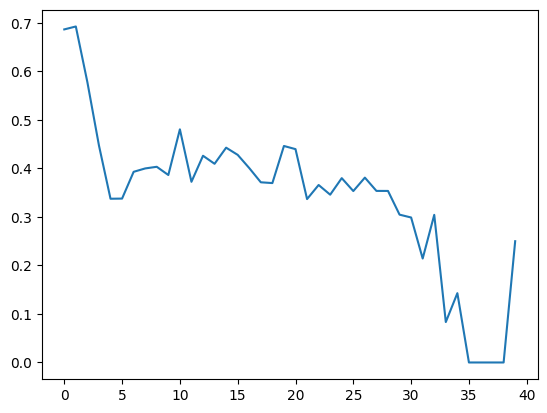

In [ ]:
d = scrape(player_url, career)

import matplotlib.pylab as plt

lists = sorted(d.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

#TODO, weighted regression